In [1]:
import pandas as pd
# %matplotlib inline
# %matplotlib widget
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
filename = './data.csv'
data_a = pd.read_csv(filename)
data_a

,time,pid,x,y,z
0,0,JB3156,0.000000,0.000000,0.000000
1,0,CC6740,0.000000,0.000000,0.000000
2,1493733882409,SA0297,0.075800,0.027300,-0.010200
3,1493733882455,SA0297,-0.035900,0.079400,0.003700
4,1493733882500,SA0297,-0.242700,-0.086100,-0.016300
...,...,...,...,...,...
14057562,1493829248196,CC6740,-0.133956,0.124726,-0.010736
14057563,1493829248220,CC6740,-0.100764,0.180872,0.046449
14057564,1493829248245,CC6740,-0.131853,0.195934,0.181088
14057565,1493829248270,CC6740,-0.149704,0.194482,0.202393


In [4]:
data_a['time'] = pd.to_datetime(data_a.time, unit = 'ms')

In [5]:
data_a['time'] = data_a['time'].astype(str).str.slice(0,19)

In [6]:
data_a

,time,pid,x,y,z
0,1970-01-01 00:00:00,JB3156,0.000000,0.000000,0.000000
1,1970-01-01 00:00:00,CC6740,0.000000,0.000000,0.000000
2,2017-05-02 14:04:42,SA0297,0.075800,0.027300,-0.010200
3,2017-05-02 14:04:42,SA0297,-0.035900,0.079400,0.003700
4,2017-05-02 14:04:42,SA0297,-0.242700,-0.086100,-0.016300
...,...,...,...,...,...
14057562,2017-05-03 16:34:08,CC6740,-0.133956,0.124726,-0.010736
14057563,2017-05-03 16:34:08,CC6740,-0.100764,0.180872,0.046449
14057564,2017-05-03 16:34:08,CC6740,-0.131853,0.195934,0.181088
14057565,2017-05-03 16:34:08,CC6740,-0.149704,0.194482,0.202393


<IPython.core.display.Javascript object>


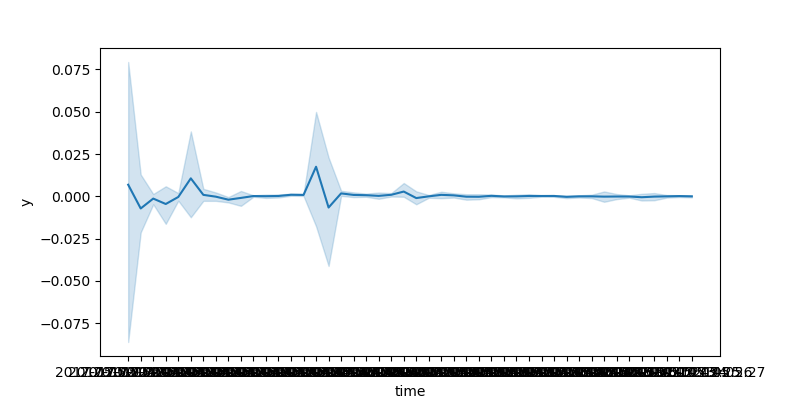

In [46]:
## check how data looks like for xyz
plt.figure(figsize = (8,4))
sns.lineplot(data = data_a[data_a['pid'] == 'SA0297'].iloc[:1000][['x','y','z','time']].sort_values(by='time'), x = 'time', y = 'y')

<IPython.core.display.Javascript object>


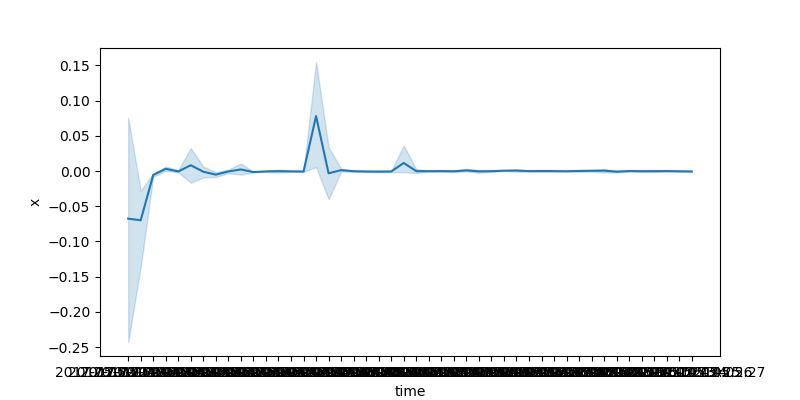

In [45]:
plt.figure(figsize = (8,4))
sns.lineplot(data = data_a[data_a['pid'] == 'SA0297'].iloc[:1000][['x','y','z','time']].sort_values(by='time'), x = 'time', y = 'x')

<IPython.core.display.Javascript object>


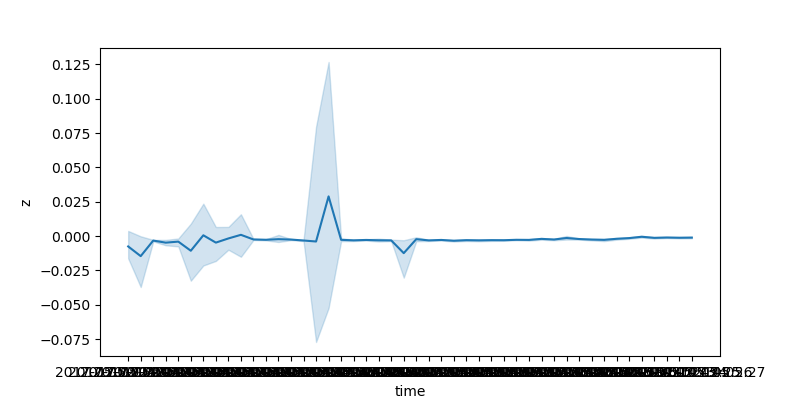

In [44]:
plt.figure(figsize = (8,4))
sns.lineplot(data = data_a[data_a['pid'] == 'SA0297'].iloc[:1000][['x','y','z','time']].sort_values(by='time'), x = 'time', y = 'z')

In [10]:
## preparing data for all pid's

con = pd.DataFrame()

path = r'C:\Users\roman\Documents\Python Scripts\Drinking\data\raw_tac'

try:
    for j in os.listdir(path):
        data = pd.read_excel(path+'\\'+j, skiprows = 1)

        j = j[:-5]

        for i in data.columns:
            if 'Unnamed' in i:
                data.drop(i, axis = 1, inplace = True)
        
        data['pid'] = j[:6]
        con = pd.concat([con,data], axis = 0)
        
        #data.to_csv(path+'\\'+j+'.csv', index = False)
except:
    print('err')

con.rename(columns = {'Time':'time'}, inplace = True)
con['time'] = con['time'].astype('string')

In [11]:
con[con['pid'] == 'BK7610']

,TAC Level,IR Voltage,Temperature,time,Date,pid
0,0.000,1.127,74.955,2017-05-02 10:36:54,2017-05-02 10:36:54,BK7610
1,0.000,1.121,74.955,2017-05-02 11:09:57,2017-05-02 11:09:57,BK7610
2,0.000,1.069,76.627,2017-05-02 11:15:27,2017-05-02 11:15:27,BK7610
3,0.000,1.060,77.371,2017-05-02 11:20:57,2017-05-02 11:20:57,BK7610
4,0.000,1.108,77.929,2017-05-02 11:26:26,2017-05-02 11:26:26,BK7610
5,0.000,1.049,78.300,2017-05-02 11:31:56,2017-05-02 11:31:56,BK7610
6,0.000,1.058,78.858,2017-05-02 11:37:25,2017-05-02 11:37:25,BK7610
7,0.000,1.101,79.416,2017-05-02 11:42:54,2017-05-02 11:42:54,BK7610
8,0.008,1.181,79.788,2017-05-02 11:48:23,2017-05-02 11:48:23,BK7610
9,0.000,1.026,73.839,2017-05-02 12:18:52,2017-05-02 12:18:52,BK7610


In [12]:
con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 53
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TAC Level    713 non-null    float64       
 1   IR Voltage   713 non-null    float64       
 2   Temperature  713 non-null    float64       
 3   time         713 non-null    string        
 4   Date         713 non-null    datetime64[ns]
 5   pid          713 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(1), string(1)
memory usage: 39.0+ KB


In [13]:
con['roll'] = pd.Series(con.set_index('time')['TAC Level'].rolling(4).mean().fillna(method = 'backfill').values)

In [14]:
con['seconds'] = con.Date.dt.second

In [15]:
data_prep = data_a.set_index(['pid','time']).join(con.set_index(['pid','time'])).reset_index()

In [16]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057567 entries, 0 to 14057566
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    object 
 1   pid     object 
 2   x       float64
 3   y       float64
 4   z       float64
dtypes: float64(3), object(2)
memory usage: 536.3+ MB


In [17]:
con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 53
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TAC Level    713 non-null    float64       
 1   IR Voltage   713 non-null    float64       
 2   Temperature  713 non-null    float64       
 3   time         713 non-null    string        
 4   Date         713 non-null    datetime64[ns]
 5   pid          713 non-null    object        
 6   roll         713 non-null    float64       
 7   seconds      713 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1), string(1)
memory usage: 50.1+ KB


In [18]:
data_prep.reset_index().info(null_counts = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057567 entries, 0 to 14057566
Data columns (total 12 columns):
 #   Column       Non-Null Count     Dtype         
---  ------       --------------     -----         
 0   index        14057567 non-null  int64         
 1   pid          14057567 non-null  object        
 2   time         14057567 non-null  object        
 3   x            14057567 non-null  float64       
 4   y            14057567 non-null  float64       
 5   z            14057567 non-null  float64       
 6   TAC Level    6477 non-null      float64       
 7   IR Voltage   6477 non-null      float64       
 8   Temperature  6477 non-null      float64       
 9   Date         6477 non-null      datetime64[ns]
 10  roll         6477 non-null      float64       
 11  seconds      6477 non-null      float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 1.3+ GB


In [19]:
## full join with fill na's
data_prep = data_prep.fillna(method = 'backfill')
data_prep.info(null_counts = 1, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057567 entries, 0 to 14057566
Data columns (total 11 columns):
 #   Column       Non-Null Count     Dtype         
---  ------       --------------     -----         
 0   pid          14057567 non-null  object        
 1   time         14057567 non-null  object        
 2   x            14057567 non-null  float64       
 3   y            14057567 non-null  float64       
 4   z            14057567 non-null  float64       
 5   TAC Level    14051765 non-null  float64       
 6   IR Voltage   14051765 non-null  float64       
 7   Temperature  14051765 non-null  float64       
 8   Date         14051765 non-null  datetime64[ns]
 9   roll         14051765 non-null  float64       
 10  seconds      14051765 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 2.8 GB


In [20]:
## clean XYZ, which we can't join with TAC normally
data_prep.dropna(inplace = True)

In [21]:
data_prep

,pid,time,x,y,z,TAC Level,IR Voltage,Temperature,Date,roll,seconds
0,BK7610,2017-05-02 14:37:50,0.1261,-0.0078,-0.0243,0.047,1.207,80.159,2017-05-02 14:41:11,0.01850,11.0
1,BK7610,2017-05-02 14:37:50,0.1336,-0.0697,-0.0446,0.047,1.207,80.159,2017-05-02 14:41:11,0.01850,11.0
2,BK7610,2017-05-02 14:37:50,0.1443,-0.0474,-0.0447,0.047,1.207,80.159,2017-05-02 14:41:11,0.01850,11.0
3,BK7610,2017-05-02 14:37:50,0.1255,-0.0038,0.0111,0.047,1.207,80.159,2017-05-02 14:41:11,0.01850,11.0
4,BK7610,2017-05-02 14:37:50,0.1076,0.0032,0.0276,0.047,1.207,80.159,2017-05-02 14:41:11,0.01850,11.0
...,...,...,...,...,...,...,...,...,...,...,...
14051760,SF3079,2017-05-03 03:29:58,-0.0506,-0.0056,-0.0384,0.159,1.056,94.064,2017-05-03 03:29:58,0.08225,58.0
14051761,SF3079,2017-05-03 03:29:58,-0.0173,-0.0086,-0.0338,0.159,1.056,94.064,2017-05-03 03:29:58,0.08225,58.0
14051762,SF3079,2017-05-03 03:29:58,0.0085,-0.0026,-0.0347,0.159,1.056,94.064,2017-05-03 03:29:58,0.08225,58.0
14051763,SF3079,2017-05-03 03:29:58,0.0226,0.0057,-0.0314,0.159,1.056,94.064,2017-05-03 03:29:58,0.08225,58.0


In [23]:
## attributes preparing
data_prep['time'] = data_prep.time.astype('datetime64[ns]')
data_prep['time_day'] = data_prep.time.dt.day
data_prep['time_hour'] = data_prep.time.dt.hour
data_prep['time_minute'] = data_prep.time.dt.minute

In [43]:
## correlation between attributes
data_prep.corr()

,x,y,z,TAC Level,IR Voltage,Temperature,roll,seconds,time_day,time_hour,time_minute
x,1.000000,0.058262,-0.058262,-0.004383,0.002356,-0.024513,-0.031071,0.004679,-0.025477,0.039367,-0.010425
y,0.058262,1.000000,-1.000000,-0.015848,-0.102611,0.003603,-0.186655,-0.028199,0.067421,0.008744,-0.014160
z,-0.058262,-1.000000,1.000000,0.015848,0.102611,-0.003603,0.186655,0.028199,-0.067421,-0.008744,0.014160
TAC Level,-0.004383,-0.015848,0.015848,1.000000,0.226332,-0.028737,0.299139,0.102588,-0.371126,0.287996,-0.025807
IR Voltage,0.002356,-0.102611,0.102611,0.226332,1.000000,-0.256906,0.192420,0.154229,-0.348355,0.439178,0.021489
Temperature,-0.024513,0.003603,-0.003603,-0.028737,-0.256906,1.000000,-0.153050,0.079551,0.467088,-0.503107,-0.006051
roll,-0.031071,-0.186655,0.186655,0.299139,0.192420,-0.153050,1.000000,0.136870,-0.341594,0.249347,-0.007423
seconds,0.004679,-0.028199,0.028199,0.102588,0.154229,0.079551,0.136870,1.000000,-0.023974,0.043922,0.007387
time_day,-0.025477,0.067421,-0.067421,-0.371126,-0.348355,0.467088,-0.341594,-0.023974,1.000000,-0.848442,-0.034951
time_hour,0.039367,0.008744,-0.008744,0.287996,0.439178,-0.503107,0.249347,0.043922,-0.848442,1.000000,-0.001238


In [26]:
## clean data
data_prep.drop(['time','Date'], inplace = True, axis = 1)

In [29]:
## train test preparation
train = data_prep.query('not (time_day == 3 & (time_hour == 2 | time_hour == 3 | time_hour == 1 | time_hour == 0))')
test = data_prep.query('time_day == 3 & (time_hour == 2 | time_hour == 3 | time_hour == 1 | time_hour == 0)')

In [42]:
## shape of train / test
train.shape[0] / (test.shape[0] + train.shape[0])

0.8939460630034732

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [31]:
import xgboost as xgb

C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [38]:
# data preparation

X_train = train.drop(['TAC Level'], axis = 1)
y_train = train['TAC Level']
X_test = test.drop(['TAC Level'], axis = 1)
y_test = test['TAC Level']

In [34]:
## which PID we can find in test

X_test.pid.value_counts()

JB3156    308036
SF3079    275760
CC6740    259652
HV0618    166824
DK3500    141545
MJ8002    104776
PC6771    102304
MC7070     75904
SA0297     53887
JR8022      1557
Name: pid, dtype: int64

<IPython.core.display.Javascript object>


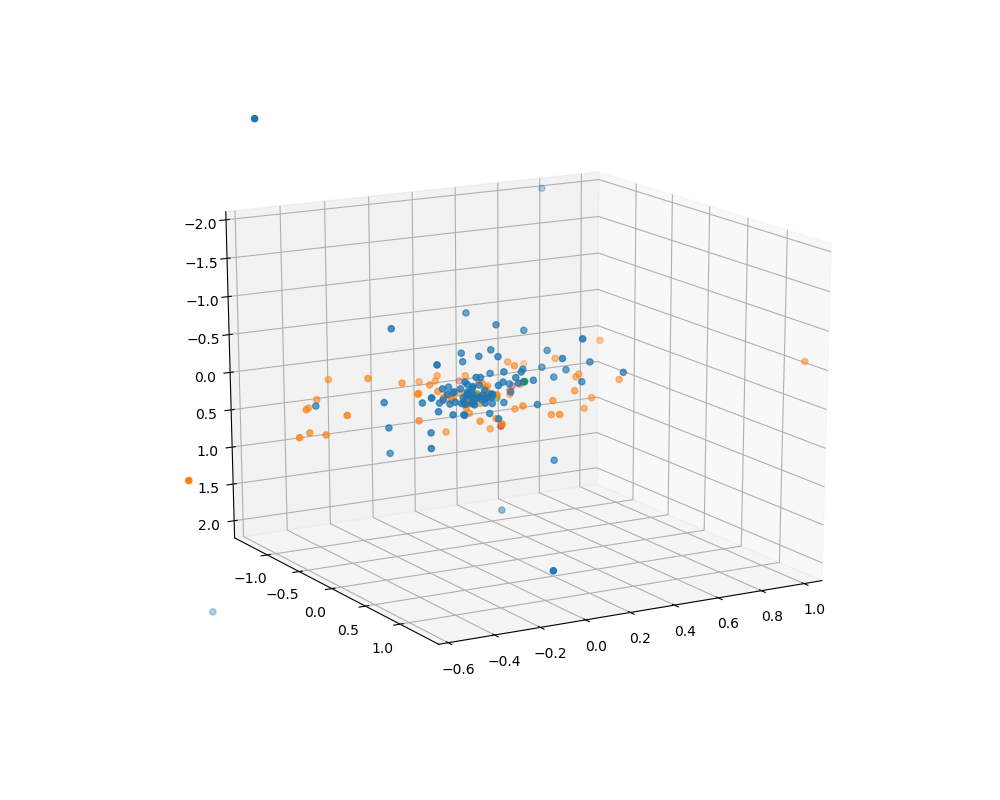

C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [35]:
## check the data spread

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
plot_test = test[test.index % 100 == 0][test.pid == 'CC6740'][:100]
plot_test_2 = test[test.index % 100 == 0][test.pid == 'SF3079'][:100]
plot_test_3 = test[test.index % 100 == 0][test.pid == 'HV0618'][:100]
plot_test_4 = test[test.index % 100 == 0][test.pid == 'JB3156'][:100]
plot_test_5 = test[test.index % 100 == 0][test.pid == 'MJ8002'][:100]

ax.scatter(plot_test.x, plot_test.y, plot_test.z)
ax.scatter(plot_test_2.x, plot_test_2.y, plot_test_2.z)
ax.scatter(plot_test_3.x, plot_test_3.y, plot_test_3.z)
# ax.scatter(plot_test_4.x, plot_test_4.y, plot_test_4.z)
ax.scatter(plot_test_5.x, plot_test_5.y, plot_test_5.z)

# ax.plot(plot_test_5.x, plot_test_5['TAC Level'], zs=0, zdir='z', label='curve in (x,y)')

In [39]:
model = xgb.XGBRegressor(n_jobs = -1, tree_method = 'exact')
model.fit(X_train.drop('pid', axis = 1), y_train)
preds=model.predict(X_test.drop('pid', axis = 1))
mean_absolute_error(preds, y_test)

0.037547096643612846